#Question 2 

##Random Forest Classifier 

Import the MNIST data 

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",version=1)

In [2]:
import numpy as np
X,y=mnist["data"],mnist["target"]
y=y.astype(int)
X=((X/255.)-.5)*2

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #train_images, val_images, train_labels, val_labels

Using 60,000 images for the training set

Train data of 60,000 images and Test data of 10,000 images 

In [4]:
print("Train data Shape",X_train.shape)
print("Test data Shape",X_test.shape)

Train data Shape (60000, 784)
Test data Shape (10000, 784)


####Train the RandomForestClassifier Model

Parameters: n_estimators = 100 and max_depth = none

In [5]:
from sklearn.ensemble import RandomForestClassifier
import time 
start_time=time.time() #start time

rnd_clf=RandomForestClassifier(n_estimators=100,max_depth=None)
rnd_clf.fit(X_train,y_train)
print("---%s seconds---" % round((time.time()-start_time)))
run_time=(round(time.time()-start_time)) #model train time

---52 seconds---


####Calculating the Accuracy and the Confusion Matrix 

In [6]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

y_pred=rnd_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred) 

Random Forest without dimensionality reduction took  52  seconds

Accuracy of Random Forest -  96.99 %
----------------------------------- 
 The Confusion Matrix


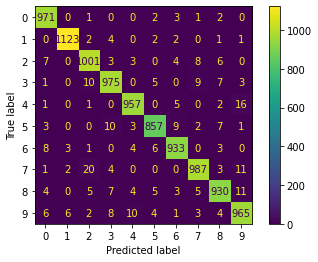

In [7]:
print("Random Forest without dimensionality reduction took ",run_time," seconds\n")
print("Accuracy of Random Forest - ",accuracy*100,"%")
print("----------------------------------- \n The Confusion Matrix")
plot_confusion_matrix(rnd_clf,X_test,y_test,values_format='d')
plt.show()

##Random Forest with PCA of explained variance of **95%**  

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X)

In this case by keeping the n_components to 0.95 we are indicating the ratio of the dataset's variance that we wish to preserve.

In [9]:
X_train, X_test, y_train, y_test = X_pca[:60000], X_pca[60000:], y[:60000], y[60000:] #train_images, val_images, train_labels, val_labels

In [10]:
X_train.shape

(60000, 154)

While most of the variance is preserved (**95%**), we can see that the feature size has reduced from the original size of **784** to **154** thus reducing the dimensionality of the train dataset and the dataset is less than **20%** of it's original size.

####Train the RandomForestClassifier Model

Parameters: n_estimators = 100 and max_depth = none

In [11]:
from sklearn.ensemble import RandomForestClassifier
import time 
start_time=time.time()

rnd_clf=RandomForestClassifier(n_estimators=100,max_depth=None)
rnd_clf.fit(X_train,y_train)
print("---%s seconds---" % round((time.time()-start_time)))
run_time=(round(time.time()-start_time))

---122 seconds---


####Calculating the Accuracy and the Confusion Matrix 

In [12]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

y_pred=rnd_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred) 

Random Forest with PCA of explained variance of 95% took 122 seconds 

Accuracy of Random Forest with PCA of explained variance of 95% took -  94.78 %
----------------------------------- 
 The Confusion Matrix


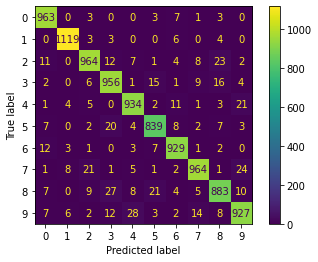

In [13]:
print("Random Forest with PCA of explained variance of 95% took",run_time,"seconds \n")
print("Accuracy of Random Forest with PCA of explained variance of 95% took - ",accuracy*100,"%")
print("----------------------------------- \n The Confusion Matrix")
plot_confusion_matrix(rnd_clf,X_test,y_test,values_format='d')
plt.show()

Random Forest Classifier is faster before the dimensionality reduction using PCA.

The reason here could be that though the dimensionality of the input features is smaller, the features could be less representative in this case and it turns out the model could be more complicated hence it might be taking longer.

The **Performance** is equally good too and the model's accuracy is almost similar to the accuracy before performing the dimensionality reduction. This is because we have kept 95% of the variance and hence have not lost useful information while reducing the dimensionality.

##Random Forest with PCA of explained variance of **90%**

In [14]:
pca=PCA(n_components=0.90)
X_pca=pca.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = X_pca[:60000], X_pca[60000:], y[:60000], y[60000:] #train_images, val_images, train_labels, val_labels

In [16]:
X_train.shape

(60000, 87)

While most of the variance is preserved (**90%**), we can see that the feature size has reduced from the original size of **784** to **87** thus reducing the dimensionality of the train dataset and the dataset is less than **11%** of it's original size.

####Train the RandomForestClassifier Model

Parameters: n_estimators = 100 and max_depth = none

In [17]:
from sklearn.ensemble import RandomForestClassifier
import time 
start_time=time.time()

rnd_clf=RandomForestClassifier(n_estimators=100,max_depth=None)
rnd_clf.fit(X_train,y_train)
print("---%s seconds---" % round((time.time()-start_time)))
run_time=(round(time.time()-start_time))

---91 seconds---


####Calculating the Accuracy and the Confusion Matrix 

In [18]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

y_pred=rnd_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred) 

Random Forest with PCA of explained variance of 90% took  91 seconds 

Accuracy of Random Forest with PCA of explained variance of 90% took -  95.38 %
----------------------------------- 
 The Confusion Matrix


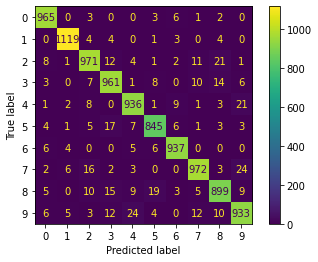

In [19]:
print("Random Forest with PCA of explained variance of 90% took ",run_time,"seconds \n")
print("Accuracy of Random Forest with PCA of explained variance of 90% took - ",accuracy*100,"%")
print("----------------------------------- \n The Confusion Matrix")
plot_confusion_matrix(rnd_clf,X_test,y_test,values_format='d')
plt.show()

With the explained variance for the PCA decreased to **90%**, the time taken to train the Random Forest model reduces as well. From **122** seconds to **91** seconds we can see that with the reduction in the dimensionality when compared to the 95% variance PCA, the time taken to train the model is less as well. 

The **Performance** is equally good too and the model's accuracy is almost similar to the accuracy before performing the dimensionality reduction. This is because we have kept 90% of the variance and hence have not lost useful information while reducing the dimensionality.

##Random Forest with PCA of explained variance of **85%**

In [20]:
pca=PCA(n_components=0.85)
X_pca=pca.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = X_pca[:60000], X_pca[60000:], y[:60000], y[60000:] #train_images, val_images, train_labels, val_labels

In [22]:
X_train.shape

(60000, 59)

While most of the variance is preserved (**85%**), we can see that the feature size has reduced from the original size of **784** to **59** thus reducing the dimensionality of the train dataset and the dataset is less than **1%** of it's original size.

####Train the RandomForestClassifier Model

Parameters: n_estimators = 100 and max_depth = none

In [23]:
from sklearn.ensemble import RandomForestClassifier
import time 
start_time=time.time()

rnd_clf=RandomForestClassifier(n_estimators=100,max_depth=None)
rnd_clf.fit(X_train,y_train)
print("---%s seconds---" % round((time.time()-start_time)))
run_time=(round(time.time()-start_time))

---72 seconds---


####Calculating the Accuracy and the Confusion Matrix 

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

y_pred=rnd_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred) 

Random Forest with PCA of explained variance of 85% took 72 seconds

Accuracy of Random Forest with PCA of explained variance of 85% took-  95.26 %
----------------------------------- 
 The Confusion Matrix


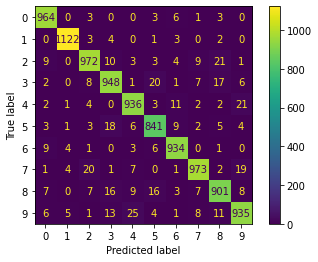

In [25]:
print("Random Forest with PCA of explained variance of 85% took",run_time,"seconds\n")
print("Accuracy of Random Forest with PCA of explained variance of 85% took- ",accuracy*100,"%")
print("----------------------------------- \n The Confusion Matrix")
plot_confusion_matrix(rnd_clf,X_test,y_test,values_format='d')
plt.show()

With the explained variance for the PCA decreased to **85%**, the time taken to train the Random Forest model reduces as well. From **91** seconds to **72** seconds we can see that with the reduction in the dimensionality when compared to the 90% variance PCA, the time taken to train the model is less as well. 

The **Performance** is equally good too and the model's accuracy is almost similar to the accuracy before performing the dimensionality reduction. This is because we have kept 85% of the variance and hence have not lost useful information while reducing the dimensionality.